# Luca & Theo first analysis of the Phillips curve

### Date started 3 March 2024
### Premise
We'd like to have a quick look at some data in order to dive into the skills expected of a data analyst, so we will:
1. Search for the relevant data online
2. Import it and create some graphs
3. See if we can reproduce the Phillips curve econometric results

In [2]:
# setup & imports

import sys

#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
inflation = pd.read_csv("inflation.csv")

In [4]:
inflation.columns = ['year', 'inflation']

In [5]:
unemployment = pd.read_csv("unemployment.csv")

In [6]:
unemployment.columns = ['month', 'unemployment']

In [11]:
# now we aggregate the unemployment data from the monthly level to the yearly one

# create the yearly date out of the monthly string date
unemployment['year'] = [date_string[:4] + '-01-01' for date_string in unemployment['month']]

unemployment.head(15)

,month,unemployment,year
0,1960-01-01,5.2,1960-01-01
1,1960-02-01,4.8,1960-01-01
2,1960-03-01,5.4,1960-01-01
3,1960-04-01,5.2,1960-01-01
4,1960-05-01,5.1,1960-01-01
5,1960-06-01,5.4,1960-01-01
6,1960-07-01,5.5,1960-01-01
7,1960-08-01,5.6,1960-01-01
8,1960-09-01,5.5,1960-01-01
9,1960-10-01,6.1,1960-01-01


In [8]:
print(unemployment.year.unique())

['1960-01-01' '1961-01-01' '1962-01-01' '1963-01-01' '1964-01-01'
 '1965-01-01' '1966-01-01' '1967-01-01' '1968-01-01' '1969-01-01'
 '1970-01-01' '1971-01-01' '1972-01-01' '1973-01-01' '1974-01-01'
 '1975-01-01' '1976-01-01' '1977-01-01' '1978-01-01' '1979-01-01'
 '1980-01-01' '1981-01-01' '1982-01-01' '1983-01-01' '1984-01-01'
 '1985-01-01' '1986-01-01' '1987-01-01' '1988-01-01' '1989-01-01'
 '1990-01-01' '1991-01-01' '1992-01-01' '1993-01-01' '1994-01-01'
 '1995-01-01' '1996-01-01' '1997-01-01' '1998-01-01' '1999-01-01'
 '2000-01-01' '2001-01-01' '2002-01-01' '2003-01-01' '2004-01-01'
 '2005-01-01' '2006-01-01' '2007-01-01' '2008-01-01' '2009-01-01'
 '2010-01-01' '2011-01-01' '2012-01-01' '2013-01-01' '2014-01-01'
 '2015-01-01' '2016-01-01' '2017-01-01' '2018-01-01' '2019-01-01'
 '2020-01-01' '2021-01-01' '2022-01-01' '2023-01-01' '2024-01-01']


In [9]:
print(unemployment.year)

0      1960-01-01
1      1960-01-01
2      1960-01-01
3      1960-01-01
4      1960-01-01
          ...    
764    2023-01-01
765    2023-01-01
766    2023-01-01
767    2023-01-01
768    2024-01-01
Name: year, Length: 769, dtype: object


In [8]:
# create a new dataframe to store the aggregated data
unemployment_yearly = pd.DataFrame(columns=['year', 'unemployment'])

# create a variable to use for filling the new dataframe
df_construction_index = 0

for year in unemployment.year.unique():
    # we take the subset of the year, calculate the avg, add it to the df, iterate
    subset = unemployment[unemployment['year'] == year]
    yearly_unemployment_average = subset['unemployment'].astype(float).mean()

    # add the newly calculated values to the results dataframe
    unemployment_yearly.loc[df_construction_index, 'year'] = year
    unemployment_yearly.loc[df_construction_index, 'unemployment'] = yearly_unemployment_average

    # increase the index so we can use it for the next row as well
    df_construction_index += 1

unemployment_yearly.sort_values(by=['year'], inplace=True)

unemployment_yearly.head(10)

# alternative method using groupby()
# unemployment_yearly_gb = unemployment.groupby('year')['unemployment'].mean()

,year,unemployment
0,1960-01-01,5.541667
1,1961-01-01,6.691667
2,1962-01-01,5.566667
3,1963-01-01,5.641667
4,1964-01-01,5.158333
5,1965-01-01,4.508333
6,1966-01-01,3.791667
7,1967-01-01,3.841667
8,1968-01-01,3.558333
9,1969-01-01,3.491667


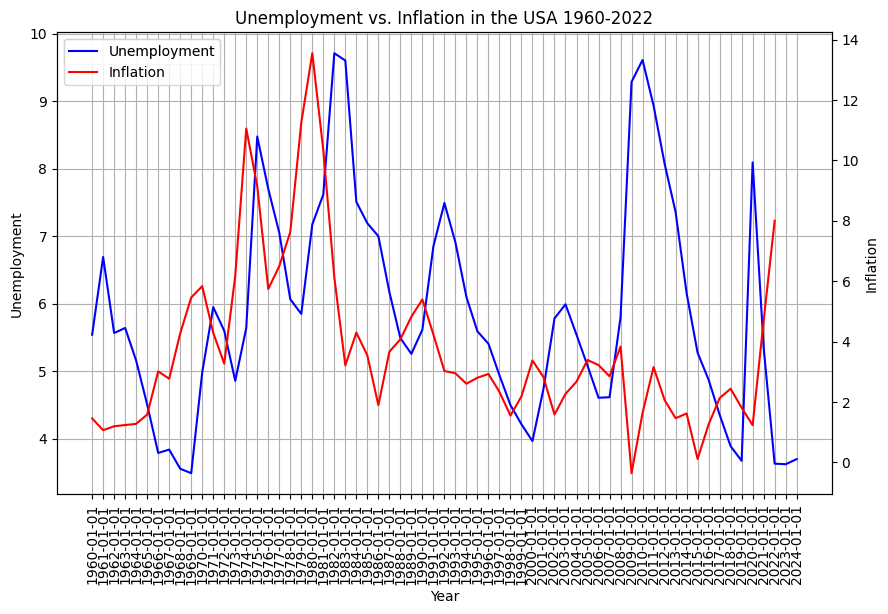

In [9]:
# now let's plot unemployment vs. inflation on opposing y-axes
fig, ax = plt.subplots(figsize=(10, 6))
axb = ax.twinx()

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')
ax.set_title('Unemployment vs. Inflation in the USA 1960-2022')
ax.grid(True)

# Plotting on the first y-axis
ax.plot(unemployment_yearly.year, unemployment_yearly.unemployment, color='blue', label='Unemployment')
ax.legend(loc='upper left')

ax.tick_params(axis='x', labelrotation=90)
# Plotting on the second y-axis
axb.set_ylabel('Inflation')
axb.plot(inflation.year, inflation.inflation, color='red', label='Inflation')

#ax.xaxis.set_major_locator(DayLocator())
#ax.xaxis.set_major_formatter(DateFormatter('%Y/%m'))

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left')